In [53]:
import torch
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [54]:
N_factor = 3

In [55]:
class Model(torch.nn.Module):

    def __init__(self):
        super().__init__()
        self.theta = torch.nn.Parameter(torch.ones(N_factor))

    def forward(self, m):

        n_obs = m.shape[0]

        y_hat = torch.zeros(n_obs) # + self.cst
        for j in range(N_factor):
            y_hat[:] += m[:, j] * self.theta[j]

        return None, y_hat

In [67]:
n_obs = 1000

theta1 = np.array([[1., 2., 4.], [-3., -2., 4.]])
theta2 = np.array([5., -3., 8.])
# cst = -3.

scale = np.array([2.0, 4., 2.])

# m = np.random.random(size=(n_obs, 3))

x = np.random.random(size=n_obs)

m = np.zeros((n_obs, N_factor))
for j in range(N_factor):
    m[:, j] = theta1[0, j] + x * theta1[1, j] + np.random.normal(scale=scale[j], size=n_obs)

y = np.zeros(n_obs)  # + cst
for j in range(N_factor):
    y[:] += m[:, j] * theta2[j]

x = None # torch.from_numpy(x).float()
m = torch.from_numpy(m).float()
y = torch.from_numpy(y).float()

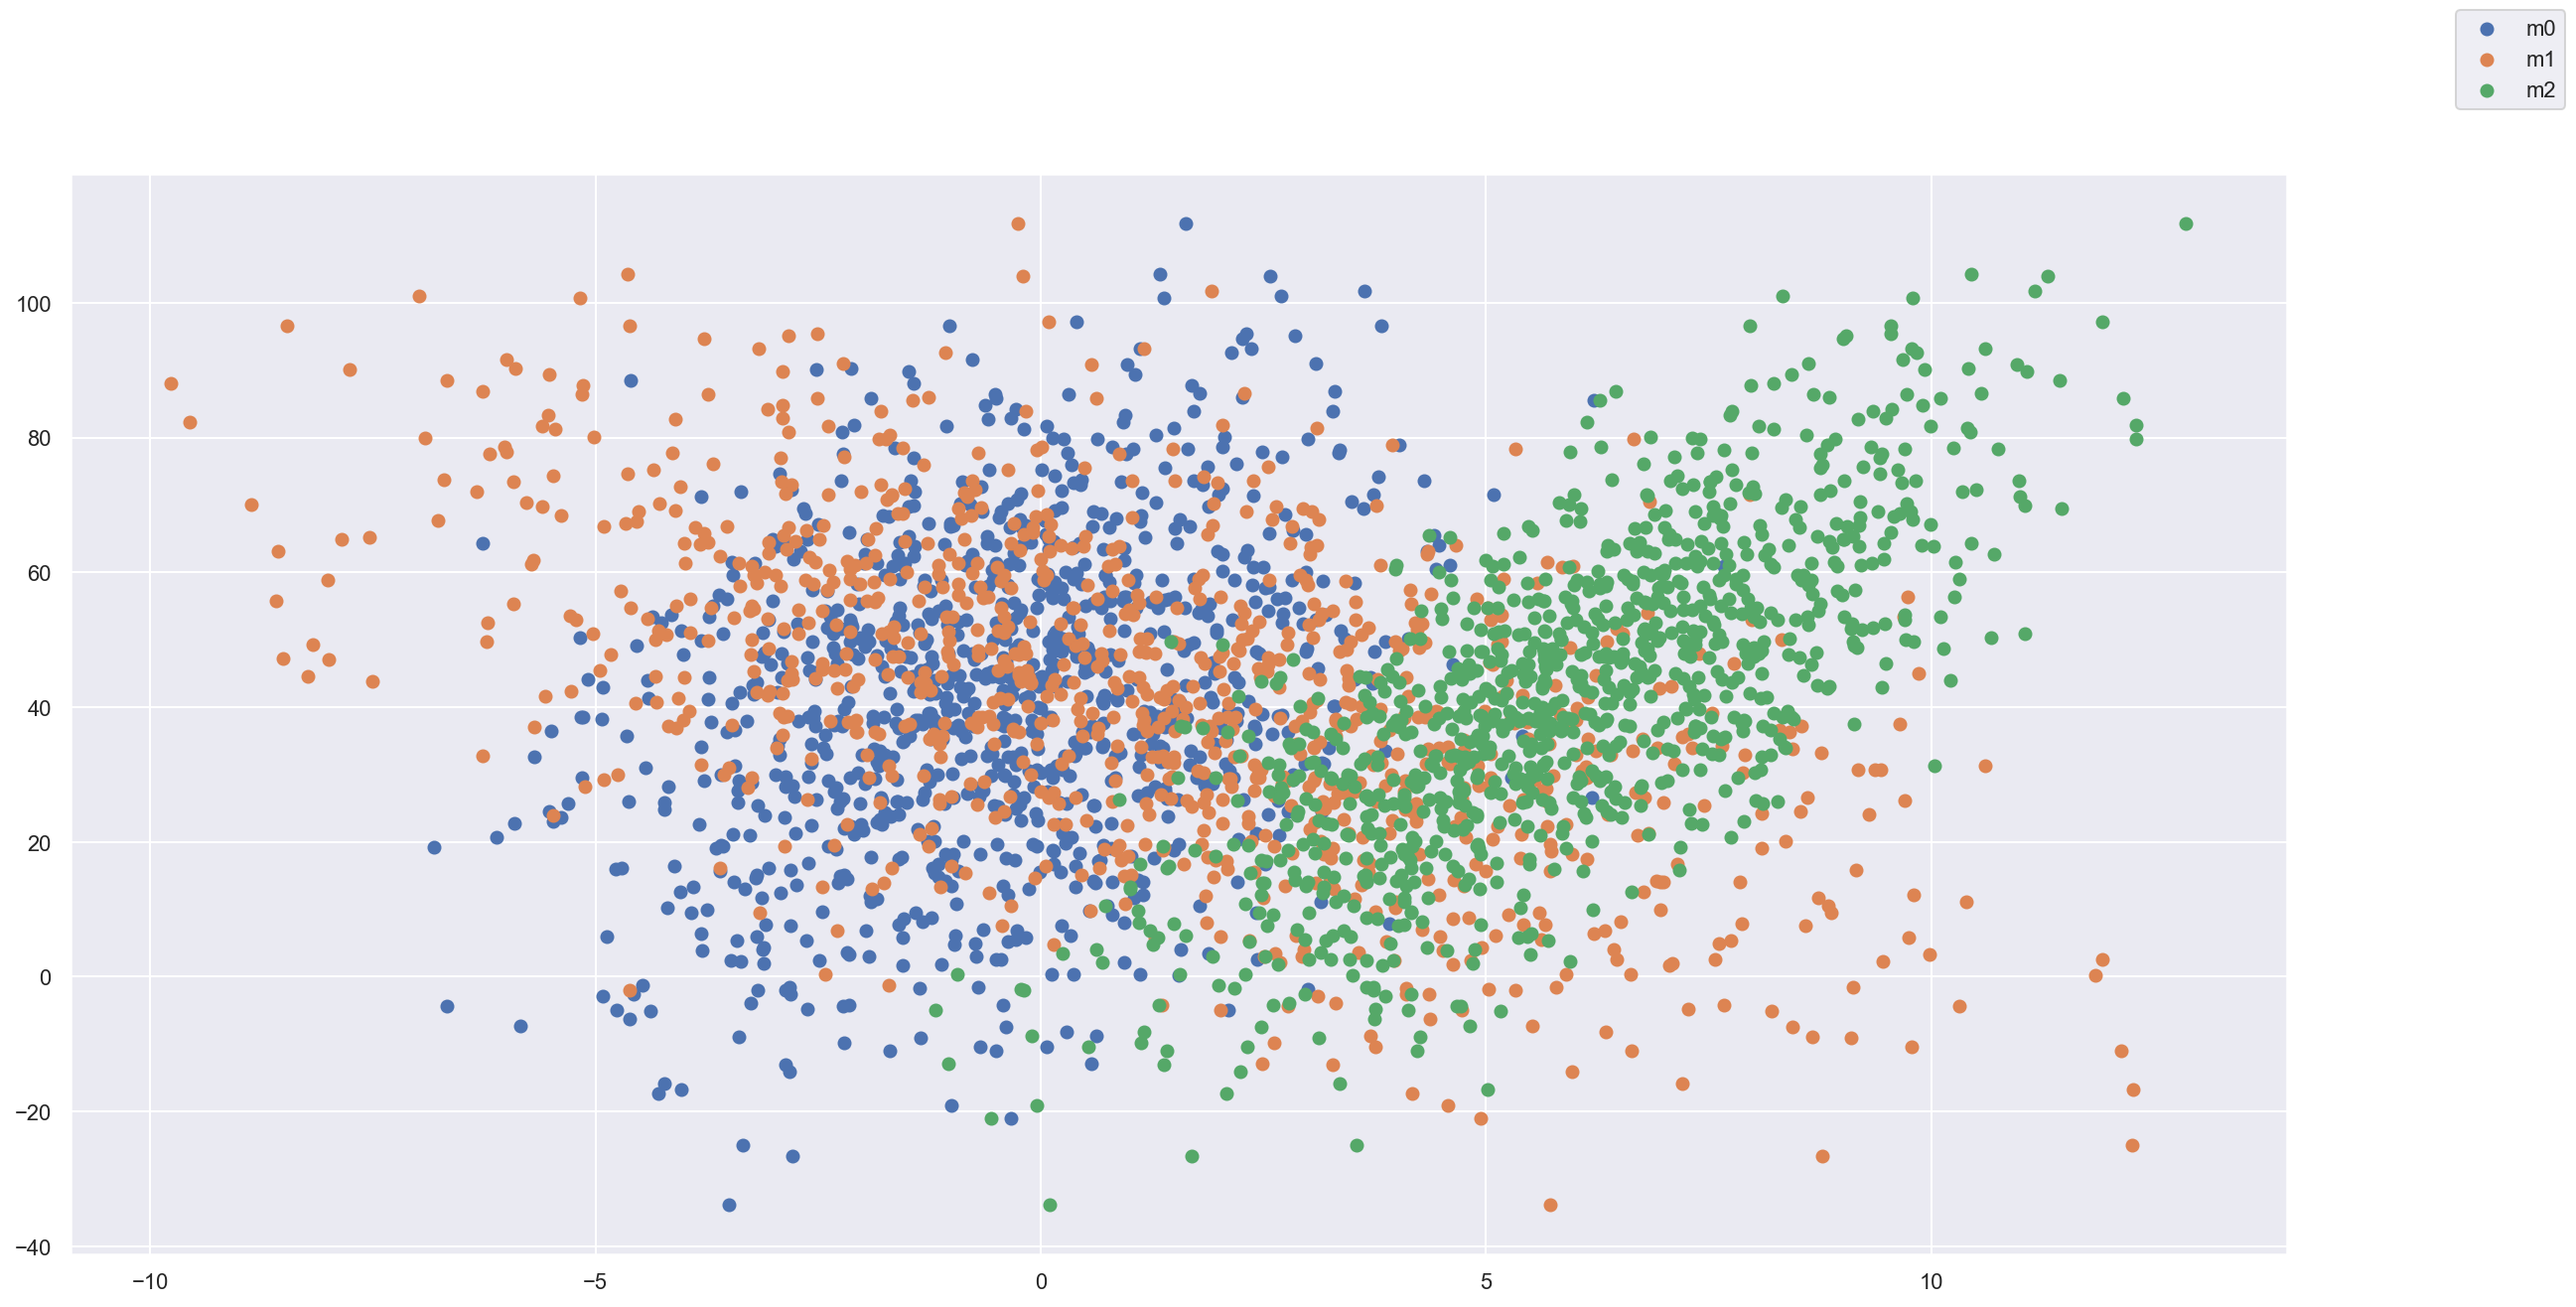

In [68]:
fig, ax = plt.subplots(figsize=(20, 10))

for j in range(N_factor):
    ax.scatter(m[:, j], y, label=f"m{j}")

fig.legend();

In [69]:
epochs = 10000

x__, y__ = m, y

model = Model()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# with tqdm(total=epochs) as pbar:

for e in range(epochs):

    optimizer.zero_grad()

    m_hat, y_hat = model(x__)
    loss = torch.mean((y_hat - y__)**2)

    loss.backward()
    optimizer.step()

print(model.theta)

Parameter containing:
tensor([ 4.9436, -2.9683,  7.9239], requires_grad=True)


In [70]:
x__[0]

tensor([2.4910, 4.7333, 5.0943])

In [52]:
torch.mean((y_hat - y__)**2)

tensor(6.0626e-08, grad_fn=<MeanBackward0>)

In [26]:
np.random.seed(123)

m_random = np.random.random(size=(1000, 3)) 

y_random = np.zeros(n_obs)  # + cst
for j in range(3):
    y_random[:] += m_random[:, j] * theta2[j]

m_random = torch.from_numpy(m_random).float()
y_random = torch.from_numpy(y_random).float()

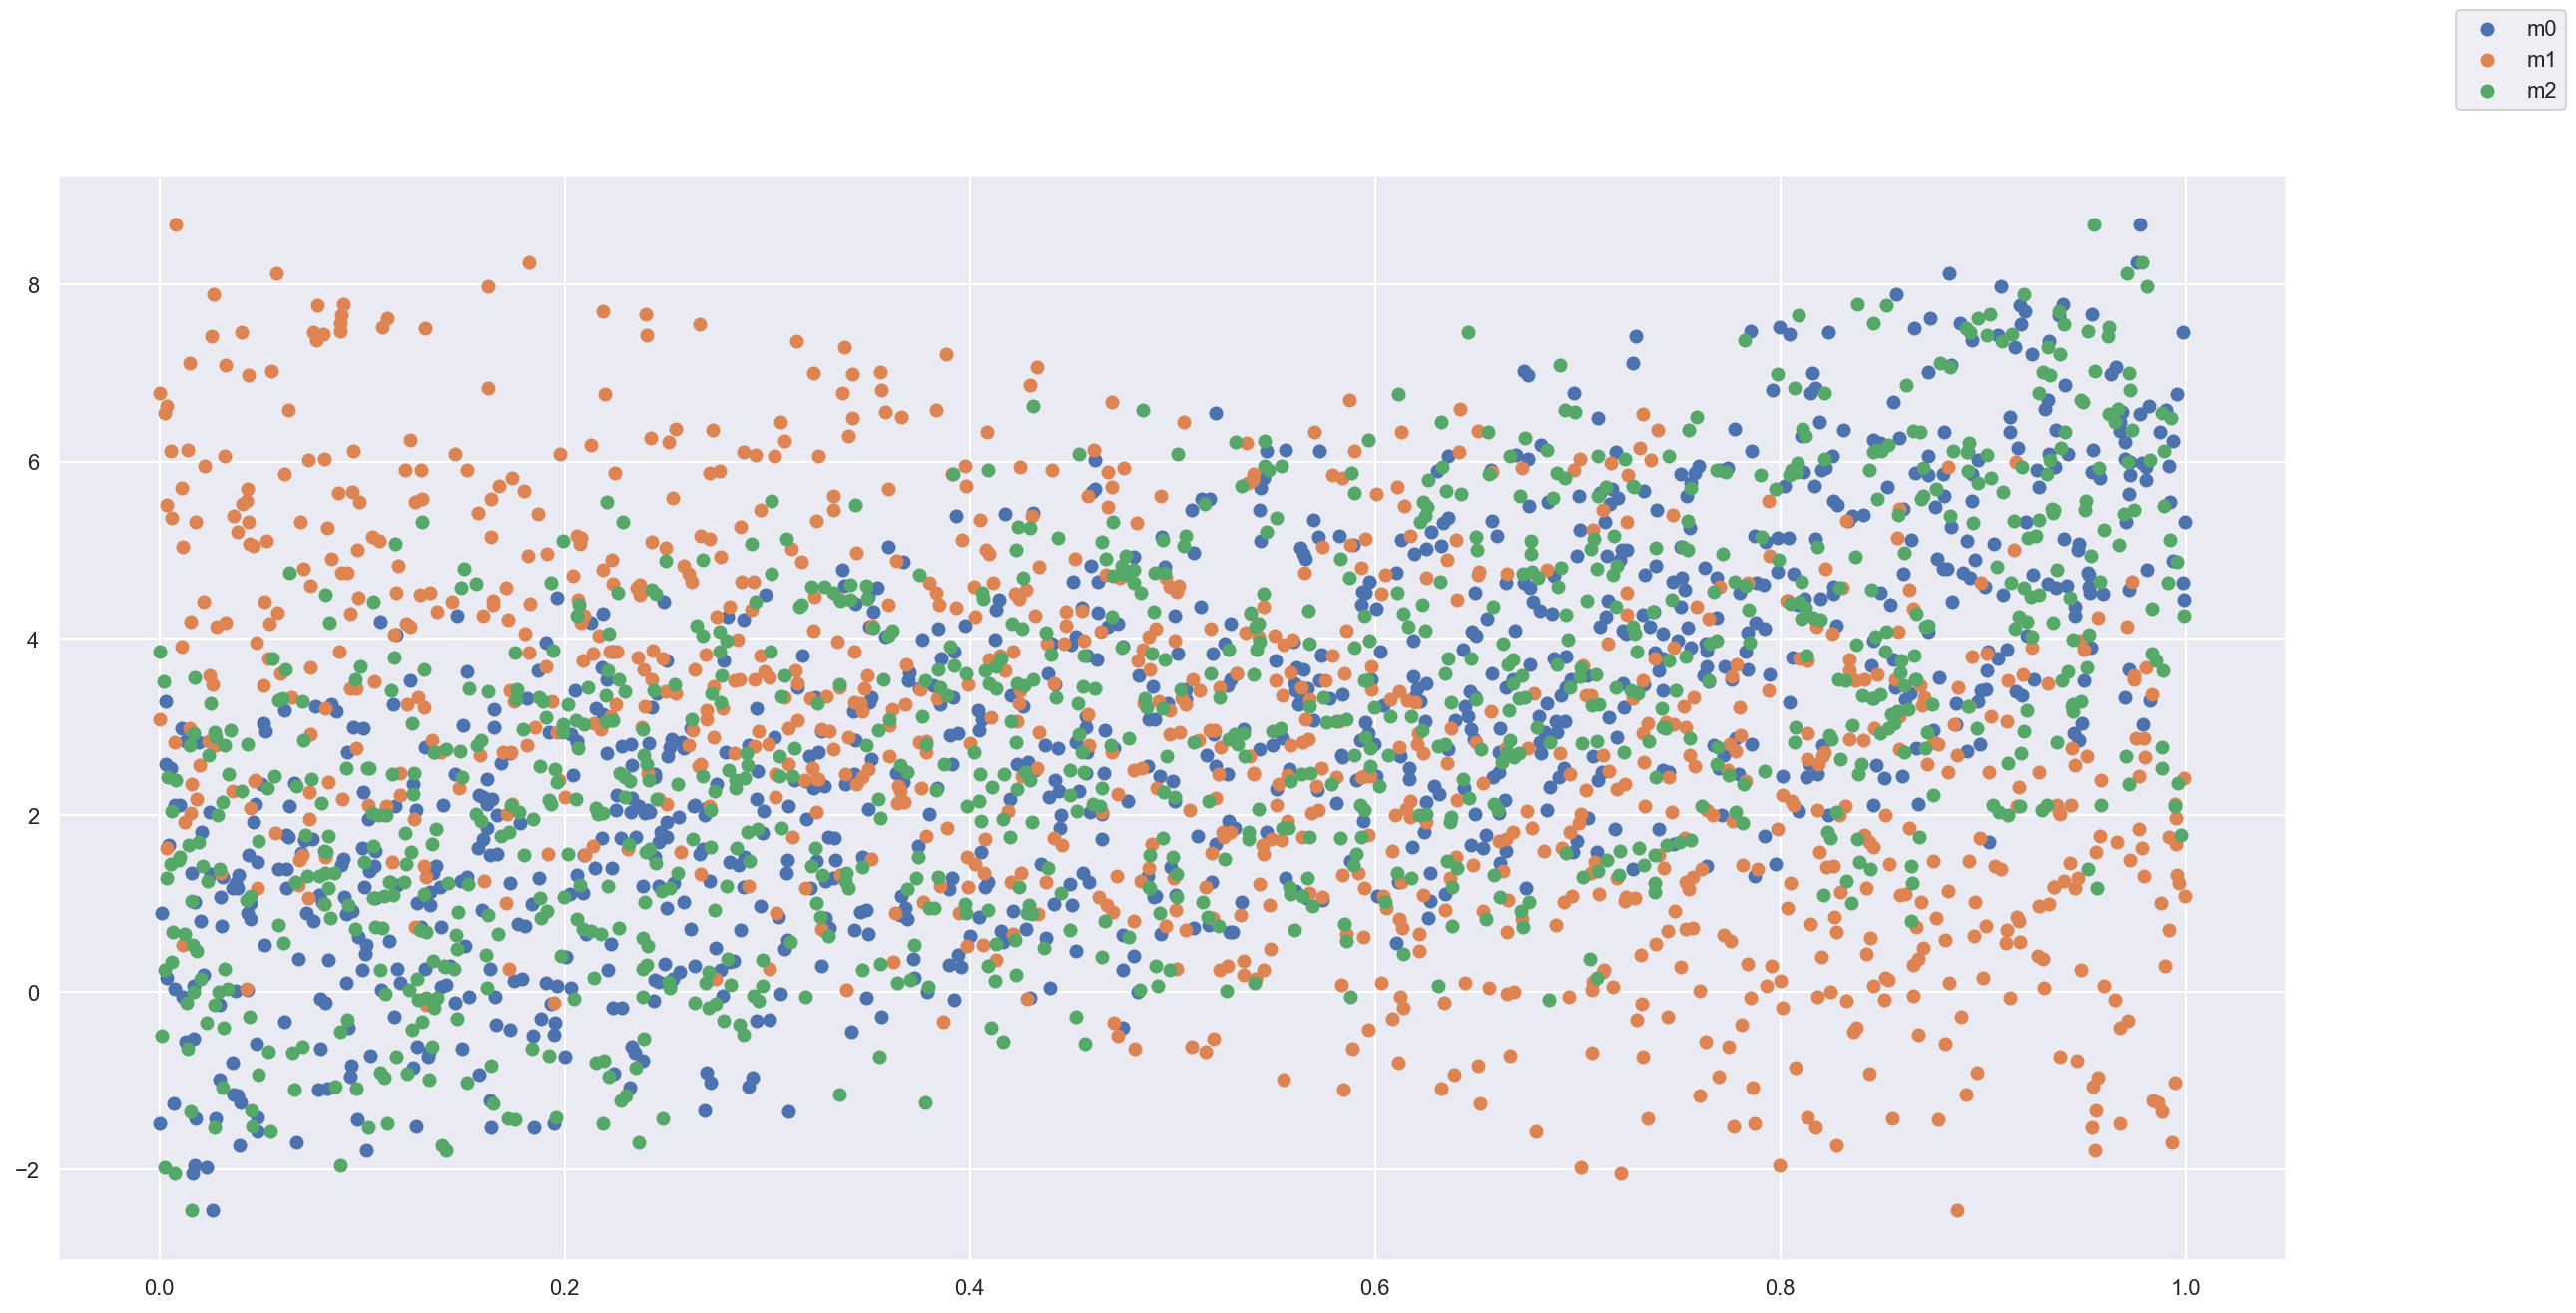

In [30]:
fig, ax = plt.subplots(figsize=(20, 10))

for j in range(3):
    ax.scatter(m_random[:, j], y_random, label=f"m{j}")

fig.legend();

In [29]:
epochs = 10000

x__, y__ = m_random, y_random

model = Model()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# with tqdm(total=epochs) as pbar:

for e in range(epochs):

    optimizer.zero_grad()

    m_hat, y_hat = model(x__)
    loss = torch.mean((y_hat - y__)**2)

    loss.backward()
    optimizer.step()

print(model.theta)

Parameter containing:
tensor([ 5.0000, -3.0000,  4.0000], requires_grad=True)
